# SVC, Random Forest, and XBoost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pickle
from datetime import datetime, timedelta 

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC



import warnings
warnings.filterwarnings('ignore')

from imblearn.under_sampling import NearMiss

In [4]:
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)

In [5]:
df.shape

(52206, 21)

In [6]:
df['STAT_CAUSE_DESCR'].value_counts()

Lightning         19825
Negligence        13595
Infrastructure     9829
Arson              8957
Name: STAT_CAUSE_DESCR, dtype: int64

In [7]:
lb = LabelEncoder()
y = lb.fit_transform(df['STAT_CAUSE_DESCR'])

In [8]:
num_data = df.select_dtypes('number')

In [9]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['STAT_CAUSE_DESCR', 'STATE', 'SOURCE_SYSTEM_TYPE', 'FIRE_SIZE_CLASS',
       'SOURCE_REPORTING_UNIT_NAME'],
      dtype='object')

In [10]:
X = df.drop(columns = ['STAT_CAUSE_DESCR', 'STATE', 'SOURCE_REPORTING_UNIT_NAME'])

In [11]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.4,
                                                    random_state = 42, stratify = y)

In [12]:
#Fitting LOGISTIC Regression
log = LogisticRegression()
column_trans = make_column_transformer(
(OneHotEncoder(), ['SOURCE_SYSTEM_TYPE', 'FIRE_SIZE_CLASS']), 
remainder = 'passthrough')
column_trans.fit_transform(X_train, y_train)
pipe = make_pipeline(column_trans,log)
print(f'Train Score: {cross_val_score(pipe,X_train,y_train, cv = 5)}')
print(f'Test Score:{cross_val_score(pipe, X_test, y_test, cv = 5)}')

Train Score: [0.54828412 0.54317638 0.54317638        nan 0.53799489]
Test Score:[0.53794589 0.55925305 0.53291836 0.55555556 0.5414272 ]


In [13]:
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.5457970181655653
0.5458028061102332


In [14]:
num_data.columns

Index(['DISCOVERY_DOY', 'duration', 'LATITUDE', 'LONGITUDE', 'FIRE_YEAR',
       'FIRE_SIZE', 'elevation', 'bdod', 'cec', 'cfvo', 'clay', 'nitrogen',
       'phh2o', 'sand', 'silt', 'soc'],
      dtype='object')

In [15]:
X = df.drop(columns = ['STAT_CAUSE_DESCR', 'STATE', 'SOURCE_REPORTING_UNIT_NAME', 
                      'DISCOVERY_DOY', 'FIRE_YEAR'])

In [16]:
new_df = df.drop(columns = ['STAT_CAUSE_DESCR', 'STATE', 'SOURCE_REPORTING_UNIT_NAME', 
                      'DISCOVERY_DOY', 'FIRE_YEAR'])

In [17]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 42, stratify = y)

In [18]:
#Fitting Linear Regression with scaling
log = LogisticRegression()
column_trans = make_column_transformer(
(StandardScaler(), ['duration', 'LATITUDE', 'LONGITUDE',
                       'FIRE_SIZE', 'elevation', 'bdod', 'cec', 'cfvo', 'clay', 'nitrogen',
                   'phh2o', 'sand', 'silt', 'soc']),
(OneHotEncoder(), ['SOURCE_SYSTEM_TYPE', 'FIRE_SIZE_CLASS']), 
remainder = 'passthrough')
column_trans.fit_transform(X_train, y_train)
pipe = make_pipeline(column_trans,log)

print(f'Train Score: {cross_val_score(pipe,X_train,y_train, cv = 5)}')
print(f'Test Score:{cross_val_score(pipe, X_test, y_test, cv = 5)}')

Train Score: [0.56888767 0.58503215        nan 0.57914899 0.57498632]
Test Score:[0.56399617 0.57708267 0.57790549 0.57215837 0.58333333]


In [19]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'LATITUDE',
                                                   'LONGITUDE', 'FIRE_SIZE',
                                                   'elevation', 'bdod', 'cec',
                                                   'cfvo', 'clay', 'nitrogen',
                                                   'phh2o', 'sand', 'silt',
                                                   'soc']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['SOURCE_SYSTEM_TYPE',
                                                   'FIRE_SIZE_CLASS'])])),
                ('logisticregression', LogisticRegression())])

In [26]:
y_preds = pipe.predict(X_test)

In [27]:
df['STAT_CAUSE_DESCR'].unique()

array(['Lightning', 'Negligence', 'Infrastructure', 'Arson'], dtype=object)

In [28]:
df_dummies = pd.get_dummies(new_df, drop_first = True)

In [30]:
with open('pickles/df.pkl', 'rb') as f:
    df_final = pickle.load(f)

In [31]:
df_final.head()

,DISCOVERY_DOY,STAT_CAUSE_DESCR,STATE,SOURCE_SYSTEM_TYPE,duration,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,...,elevation,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc
1,133,Lightning,CA,FED,0.0,A,38.933056,-120.404444,Eldorado National Forest,2004,...,1842,102.0,335.0,246.0,140.0,466.0,58.0,550.0,309.0,741.0
2,152,Negligence,CA,FED,0.0,A,38.984167,-120.735556,Eldorado National Forest,2004,...,1067,119.0,213.0,137.0,244.0,343.0,58.0,331.0,425.0,573.0
3,180,Lightning,CA,FED,5.0,A,38.559167,-119.913333,Eldorado National Forest,2004,...,2365,110.0,129.0,216.0,66.0,201.0,55.0,755.0,179.0,458.0
4,180,Lightning,CA,FED,5.0,A,38.559167,-119.933056,Eldorado National Forest,2004,...,2316,118.0,137.0,212.0,68.0,156.0,55.0,740.0,192.0,410.0
5,182,Lightning,CA,FED,1.0,A,38.635278,-120.103611,Eldorado National Forest,2004,...,2541,108.0,204.0,230.0,66.0,283.0,55.0,697.0,237.0,509.0


In [32]:
df_final['STAT_CAUSE_DESCR'].value_counts()

Lightning         19825
Negligence        13595
Infrastructure     9829
Arson              8957
Name: STAT_CAUSE_DESCR, dtype: int64

In [33]:
lb = LabelEncoder()
df_final['status_cause_labels'] = lb.fit_transform(df_final['STAT_CAUSE_DESCR'])

In [34]:
y = df_final['status_cause_labels']

In [35]:
df_final['status_cause_labels'].value_counts()

2    19825
3    13595
1     9829
0     8957
Name: status_cause_labels, dtype: int64

In [36]:
cf_labels = ['Arson', 'Infrastructure', 'Negligence', 'Negligence']

In [37]:
df_final.drop(columns = ['STAT_CAUSE_DESCR', 'STATE', 'SOURCE_REPORTING_UNIT_NAME', 
                      'DISCOVERY_DOY', 'FIRE_YEAR', 'FIRE_SIZE_CLASS'], axis = 1, inplace = True)

In [38]:
df_final.head()

,SOURCE_SYSTEM_TYPE,duration,LATITUDE,LONGITUDE,FIRE_SIZE,elevation,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc,status_cause_labels
1,FED,0.0,38.933056,-120.404444,0.25,1842,102.0,335.0,246.0,140.0,466.0,58.0,550.0,309.0,741.0,2
2,FED,0.0,38.984167,-120.735556,0.10,1067,119.0,213.0,137.0,244.0,343.0,58.0,331.0,425.0,573.0,3
3,FED,5.0,38.559167,-119.913333,0.10,2365,110.0,129.0,216.0,66.0,201.0,55.0,755.0,179.0,458.0,2
4,FED,5.0,38.559167,-119.933056,0.10,2316,118.0,137.0,212.0,68.0,156.0,55.0,740.0,192.0,410.0,2
5,FED,1.0,38.635278,-120.103611,0.10,2541,108.0,204.0,230.0,66.0,283.0,55.0,697.0,237.0,509.0,2


In [39]:
final_dummies = pd.get_dummies(df_final, drop_first = True)

In [40]:
final_dummies.head()

,duration,LATITUDE,LONGITUDE,FIRE_SIZE,elevation,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc,status_cause_labels,SOURCE_SYSTEM_TYPE_INTERAGCY,SOURCE_SYSTEM_TYPE_NONFED
1,0.0,38.933056,-120.404444,0.25,1842,102.0,335.0,246.0,140.0,466.0,58.0,550.0,309.0,741.0,2,0,0
2,0.0,38.984167,-120.735556,0.10,1067,119.0,213.0,137.0,244.0,343.0,58.0,331.0,425.0,573.0,3,0,0
3,5.0,38.559167,-119.913333,0.10,2365,110.0,129.0,216.0,66.0,201.0,55.0,755.0,179.0,458.0,2,0,0
4,5.0,38.559167,-119.933056,0.10,2316,118.0,137.0,212.0,68.0,156.0,55.0,740.0,192.0,410.0,2,0,0
5,1.0,38.635278,-120.103611,0.10,2541,108.0,204.0,230.0,66.0,283.0,55.0,697.0,237.0,509.0,2,0,0


In [41]:
final_dummies.drop(columns = 'status_cause_labels', inplace = True)

In [42]:
X = final_dummies.copy()

In [43]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 42, stratify = y)

In [44]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3],
}

In [45]:
rf = RandomForestClassifier()

In [48]:
gs = GridSearchCV(rf,
                  param_grid = rf_params, # what object are we optimizing?
                  # what parameters values are we searching?
                  cv = 5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.6629542661449475


{'max_depth': None, 'n_estimators': 200}

In [49]:
final_dummies_1 = final_dummies.drop(columns = ['FIRE_SIZE', 'bdod', 'sand', 'silt', 'soc'])

In [50]:
X = final_dummies_1.copy()

In [51]:
X.shape

(52206, 11)

In [52]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 42, stratify = y)

In [53]:
#XGBoost Classifier
xgb = XGBClassifier()

In [54]:
#Defining Parameters
xgb_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1]
}

In [55]:
#GridsearchCV
gs_xgb = GridSearchCV(xgb, # what object are we optimizing?
                  param_grid = xgb_params,# what parameters values are we searching?
                  cv = 5)

In [56]:
#Fitting XGBoost
gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [None, 1],
                         'n_estimators': [100, 150, 200]})

In [57]:
#Best Score and parametres with XGBoost Model
print(gs_xgb.best_score_)
print(gs_xgb.best_params_)

0.6623520851357576
{'max_depth': None, 'n_estimators': 100}


In [58]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [59]:
pgrid = {"C": np.linspace(0.0001, 2, 6)}

In [60]:
# (THREAD) Instantiate and fit a gridsearch model for this SVC!
svc = LinearSVC(max_iter= 1000)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gcv = GridSearchCV(svc, pgrid, cv=cv)
gcv.fit(X_train_ss, y_train);

In [61]:
gcv.best_score_

0.5720775789616285

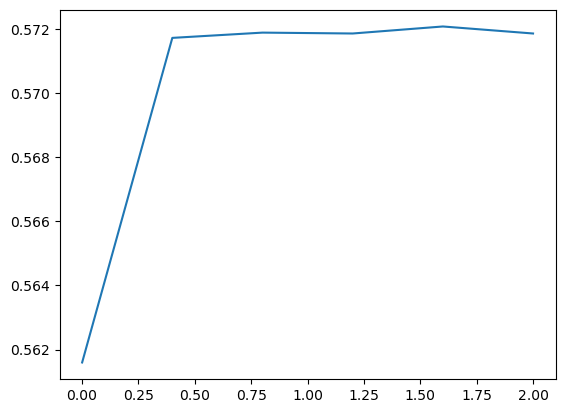

In [62]:
# Save cv results as a DataFrame
df_svc = pd.DataFrame(gcv.cv_results_)

# Visualize how different values of C affect accuracy
plt.plot("param_C", "mean_test_score", data = df_svc);